In [25]:
import ijson
import pandas as pd
# import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)
pylab.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [26]:
filename = "json_data/inc5000_2016.json"

In [27]:
good_columns = [
    "city",
    "state_l",
    "metro",
    "revenue",
    "url",
    "industry",
    "workers",
    "rank",
    "id",
    "yrs_on_list",
    "growth",
    "ifmid",
    "ifiid",
    "state_s",
    "company"
]

In [28]:
data = []
with open(filename, 'r') as f:
    for item in ijson.items(f, "item"):
        data.append(item.values())

In [29]:
data[299]

[u'White Plains',
 u'New York',
 u'New York City',
 5758886,
 u'licenselogix',
 u'Business Products & Services',
 32,
 300,
 43175,
 1,
 Decimal('1300.32'),
 9,
 17,
 u'NY',
 u'LicenseLogix']

In [30]:
df = pd.DataFrame(data, columns = good_columns)

In [31]:
df

,city,state_l,metro,revenue,url,industry,workers,rank,id,yrs_on_list,growth,ifmid,ifiid,state_s,company
0,Los Angeles,California,Los Angeles,116247698,loot-crate,Consumer Products & Services,218,1,42940,1,66788.5962,2,4,CA,Loot Crate
1,Somerville,Massachusetts,Boston,55018793,paint-nite,Consumer Products & Services,100,2,42941,1,36555.2472,6,4,MA,Paint Nite
2,Visalia,California,"Visalia-Porterville, CA",33507450,calcom-solar,Energy,47,3,42942,1,31633.5448,172,16,CA,CalCom Solar
3,Evansville,Indiana,"Evansville, IN-KY",30695215,eluxurysupplycom,Retail,82,4,36643,2,23619.7198,641,18,IN,eLuxurySupply.com
4,Atlanta,Georgia,Atlanta,33370967,companycom,Business Products & Services,48,5,36639,2,23486.8894,29,17,GA,Company.com
5,Cambridge,Massachusetts,Boston,17743829,globalization-partners,Business Products & Services,15,6,42943,1,16196.5338,6,17,MA,Globalization Partners
6,New York,New York,New York City,15733570,bounce-exchange,Software,130,7,42944,1,14574.6474,9,9,NY,Bounce Exchange
7,Santa Monica,California,Los Angeles,15598837,los-york,Advertising & Marketing,25,8,42945,1,14404.6093,2,5,CA,Los York
8,Pittsburgh,Pennsylvania,"Pittsburgh, PA",42425003,pantherx-specialty-pharmacy,Health,39,9,42946,1,13380.8799,52,10,PA,PANTHERx Specialty Pharmacy
9,Leesburg,Virginia,"Washington, DC",25863238,fedbiz-it-solutions,Government Services,9,10,42947,1,12620.5845,3,7,VA,FedBiz IT Solutions


In [32]:
df.to_csv('csv_data/2016_inc5k.csv')

# CURATING BY AFFORDABILITY
<hr>

So let's start looking at the companies that we can afford.

In [33]:
affordable = df[(df['revenue'] > 999999) & (df['revenue'] < 29999999)]
affordable.shape

(3829, 15)

3 out of 4 of the 2016 Inc 5000 companies have revenue between **1M** and **30M** dollars.

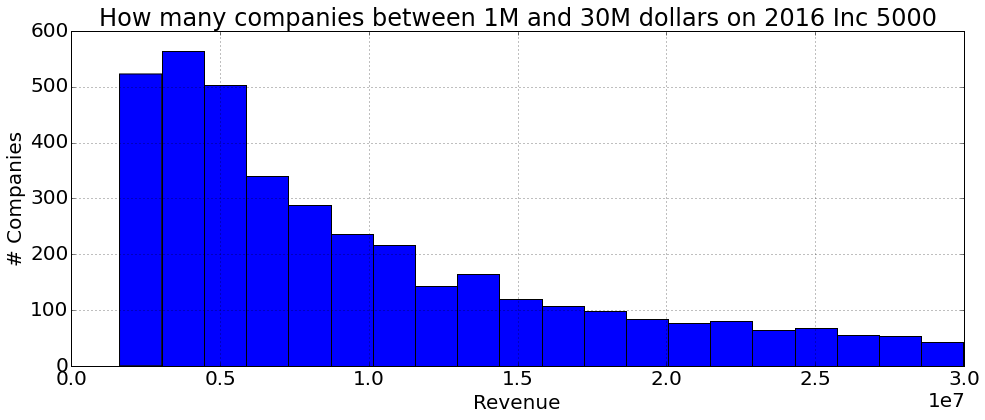

In [34]:
allrev16_plot = affordable['revenue'].hist(bins=20)
allrev16_plot.set_title("How many companies between 1M and 30M dollars on 2016 Inc 5000 ")
allrev16_plot.set_xlabel("Revenue")
allrev16_plot.set_ylabel("# Companies")

**No clear 'sweet spot' when arranged purely by revenue.**

But then this is ALL companies between **1M** and **30M** dollars. Let's sort companies we can afford by Agency-like descriptions:

In [35]:
industry_breakdown = affordable[['revenue','industry']].groupby('industry')
industry_breakdown.size()

industry
Advertising & Marketing         413
Business Products & Services    383
Computer Hardware                20
Construction                    190
Consumer Products & Services    175
Education                        58
Energy                           65
Engineering                      53
Environmental Services           29
Financial Services              169
Food & Beverage                 101
Government Services             186
Health                          269
Human Resources                 125
IT Services                     556
Insurance                        52
Logistics & Transportation       74
Manufacturing                   122
Media                            56
Real Estate                     146
Retail                          129
Security                         53
Software                        287
Telecommunications               71
Travel & Hospitality             47
dtype: int64

**Wow, looks like (for the companies in our price range) only _'IT services'_ has more possible acqusition targets thant _'Advertising and Marketing'_ companies.**

413 companies identified off the bat. Now let's move on to analysze those companies by some type of profitability.

# VISUALIZING  (The 413 Affordable) AGENCIES BY PROFITABILITY

Starting with those 413, which of those are most profitable? (They might be harder to buy)

Profitability (Margin) = Income / Expense

...which we can approximate with this formula (for now)...

**profit = revenue / workers**

In [36]:
# affordable
agencies = affordable[(affordable['industry'] == "Advertising & Marketing")]
agencies.shape

(413, 15)

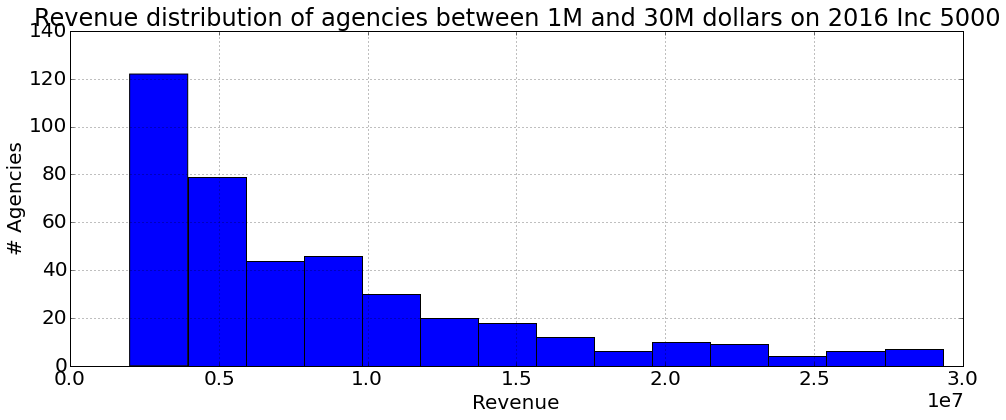

In [37]:
agency_plot = agencies['revenue'].hist(bins=14)
agency_plot.set_title("Revenue distribution of agencies between 1M and 30M dollars on 2016 Inc 5000 ")
agency_plot.set_xlabel("Revenue")
agency_plot.set_ylabel("# Agencies")

In [38]:
profitable_agencies = agencies[['company','revenue','workers','growth']]
# profitable_agencies['profitability']= profitable_agencies.Action.apply(profitable_agencies.revenue/profitable_agencies.workers)
profitable_agencies['profitability']= profitable_agencies.revenue/profitable_agencies.workers
profitable_agencies.sort(['profitability'], ascending = False, inplace = True)
profitable_agencies

,company,revenue,workers,growth,profitability
1173,Rainmaker Ad Ventures,8005109,2,331.7927,4002554.500000
4605,Footbridge Media,2158846,1,52.8922,2158846.000000
3375,Day Online Solutions,4203602,2,97.1784,2101801.000000
137,Boost Marketing Group,8356001,4,2559.3852,2089000.250000
1310,Linfield Media / PromoCodesForYou,8189230,4,295.3652,2047307.500000
1036,Media Bridge Advertising,10536415,6,381.8863,1756069.166667
1639,SeQuel Response,27032125,17,229.0265,1590125.000000
951,BrandedOffers.com,5825366,5,417.3132,1165073.200000
671,Adseek Media,3345480,3,584.43,1115160.000000
61,Sparty Ventures,5509381,5,4271.6919,1101876.200000


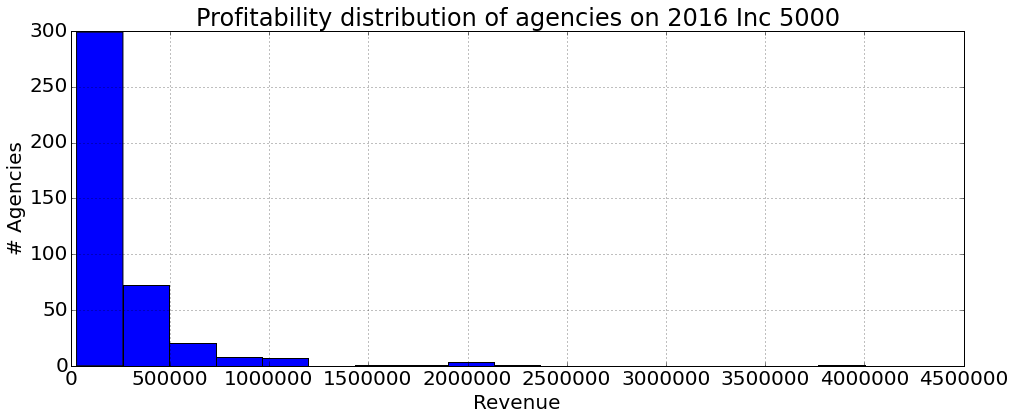

In [39]:
profit_plot=profitable_agencies['profitability'].hist(bins=17)
profit_plot.set_title('Finding the profitability zone')
profit_plot.set_title("Profitability distribution of agencies on 2016 Inc 5000")
profit_plot.set_xlabel("Revenue")
profit_plot.set_ylabel("# Agencies")

So looks like most of the 413 Agencies we can afford are in that zone ending at **25,000 dollars per worker.**

About 75 of those agencies top out at around ** 25,000 dollars per worker.** For example, **Dealer Spike** has 219 workers, and made 12.2M, so has a profitability score of 56,106 dollars per worker.

Let's get a list of those 75 agencies. We can compare those 'profitable' agencies for previous years, to track their revenue and proftiability growth.

In [40]:
highly_profitable = profitable_agencies[(profitable_agencies['profitability'] > 249999) & (profitable_agencies['profitability'] < 500000)]
# affordable = df[(df['revenue'] > 999999) & (df['revenue'] < 29999999)]
# affordable.shape
highly_profitable.shape

(82, 5)

In [41]:
highly_profitable.company

2188                   Factory 360
1455                      EdgeCore
4468                    Division-D
708                         Tongal
351                     Palo Media
1962                  Retail Radio
1517                      Brandito
959                        MarkSYS
4902                       InkHead
4600                  Meyer Dunlap
578     Sports Marketing Monterrey
1827                 Colling Media
1025                     BrandXads
1160                   Nelson Cash
423                      NextAfter
...
2027             Cord Media Company
3748                   CommCreative
2828                       Aimclear
769                      Fell Swoop
2760              Restoration Media
904              Marketing With You
1969         Marketeching Solutions
3081    Pride Products Distributors
3495                        Vincodo
4062     TopSpot Internet Marketing
1647                   BBR Creative
4452                      Exhibitus
135                     Pop! Promos
376

In [48]:
agency_3 = df['company']=="EdgeCore"

In [49]:
df[agency_3]

,city,state_l,metro,revenue,url,industry,workers,rank,id,yrs_on_list,growth,ifmid,ifiid,state_s,company
1455,Cedar Falls,Iowa,"Waterloo-Cedar Falls, IA",22162203,edgecore,Advertising & Marketing,45,1455,19596,5,263.2835,169,5,IA,EdgeCore


In [51]:
agency_4 = df['company']=="Taradel"

In [52]:
df[agency_4]

,city,state_l,metro,revenue,url,industry,workers,rank,id,yrs_on_list,growth,ifmid,ifiid,state_s,company
2061,Glen Allen,Virginia,"Richmond, VA",10902369,taradel,Advertising & Marketing,27,2062,3794,9,180.6866,40,5,VA,Taradel
